**El dataset adquirido, para este ejercicio es proveniente de kaggle.
En estas  primeras líneas se importan las librerias, principalmente relacionadas con la lectura y procesamiento de el dataset, y las de NLP.**

In [1]:
#Importación de librería
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
spacy.prefer_gpu()
nlp_es = spacy.load('en_core_web_sm')
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#Lectura del csv y visualziación de los primeros renglones.
df2 = pd.read_csv("emails.csv")
df2.head() 

text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

#### Se realiza la correspondiente separacion de los mensajes y su etiqueta, además de entre entrenamiento y test.

In [3]:
X = df2['text']
Y = df2['spam']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)
X_train

4418    Subject: re : message from ken rice  dorothy ,...
4084    Subject: re : b . brandfass  barbara ,  my apo...
2574    Subject: new commodity marketplace opportunity...
1988    Subject: re : houston visit  thank you very mu...
3934    Subject: presentation for cal berkeley  hello ...
                              ...                        
4158      Subject: re : requests for help  thanks vince .
1932    Subject: re : good morning  that ' s great .  ...
3386    Subject: marking chairs  hello all :  unfortun...
3372    Subject: re : real options conference in cambr...
3725    Subject: re : ll visa - anshuman shrivastava  ...
Name: text, Length: 4582, dtype: object

**Se realiza una gráfica que nos muestra la  cantidad de ejemplos que se tienen de Ham vs Spam.**

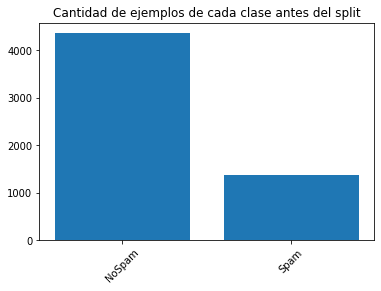

In [4]:
Totales = df2['spam'].value_counts()
plt.bar(['NoSpam', 'Spam'], Totales)
plt.xticks(rotation = 45)
plt.title('Cantidad de ejemplos de cada clase antes del split') 
plt.show()

In [5]:
# Se detecta si existen filas vacías, asi como se realiza la eliminación de las mismas y se presenta el temaño del data 
#frame una ves la impieza se a realizado.
print("Tamaño del data frame: " + str(len(df2)))
print("Cantidad de filas vacías:")
print(df2.isnull().sum())
result2 = df2.dropna()
result2 = df2[df2['text'] != ""]
print("\nTamaño del data frame sin vacíos: " + str(len(df2)))

Tamaño del data frame: 5728
Cantidad de filas vacías:
text    0
spam    0
dtype: int64

Tamaño del data frame sin vacíos: 5728


**Dado que no se presentan filas vacías, no es necesario realizar este proceso en pasos siguientes.**

***
### EDA
***

In [6]:
#Se relaiza la correspondiente separación, de el conjunto de entrenamiento, entrelos mensajes que correponden a spam y ham.
spam_messages=[]
ham_messages=[]
cont=0
for i in range(0,len(Y_train)):
    try:
        if Y_train.iloc[i]==1:
            spam_messages.append(X_train.iloc[i])
        elif Y_train.iloc[i]==0:
            ham_messages.append(X_train.iloc[i])
    except Exception as e:
        cont=cont+1
        print(e,cont)
#print(spam_messages)

In [7]:
X_train.iloc[2]

'Subject: new commodity marketplace opportunity  mark lay : i shared confidentially with vince kaminski my developing  concept of a highly inefficient not - for - profit enterprise with  dramatically increasing costs . i believe that a for - profit economic  model is possible that should reverse these skyrocketing costs and  ultimately lower the commodity thereby having a national , if not , global  impact of health care costs . vince seems to also believe in the  concepts potential . the ceo of one of the biggest u . s . blood banks has  already asked to become involved . i would like involve more people  with vision , means and desire to help make this a reality . i would look  forward to meeting with you to talk further . al arfsten 713 965 2158'

In [8]:
spam_messages_pr=[]
ham_messages_pr=[]
for i in range(0,len(spam_messages)):
    spam_messages_pr.append(nlp_es(str(spam_messages[i].lower())))
for j in range(0,len(ham_messages)):
    ham_messages_pr.append(nlp_es(str(ham_messages[j].lower())))

In [9]:
print(ham_messages_pr[3])

subject: re : houston visit  thank you very much for your prompt reply . pls let me know if you ' re going  to be in ny , otherwise i look forward to seeing you soon in houston .  soussan  ( 914 ) 253 - 4187  - - - - - original message - - - - -  from : vince . j . kaminski @ enron . com [ mailto : vince . j . kaminski @ enron . com ]  sent : tuesday , april 25 , 2000 11 : 23 am  to : faizs @ texaco . com  subject : re : houston visit  soussan ,  it looks fine .  look forward to meeting you again in houston or new york .  vince  " faiz , soussan " on 04 / 25 / 2000 09 : 29 : 34 am  to : " ' vince . j . kaminski @ enron . com ' "  cc :  subject : re : houston visit  dear vince ,  firstly , i really appreciate your time and our meeting last week . learning  about enron ' s use of leading - edge practices was quite enlightening and i  truly benefited from our visit .  secondly , i ' ve summarized my key " take - aways " as stated below . before  conveying it to my management , however , i

***Análisis de la cantidad de caracteres por ejemplo de mensajes***

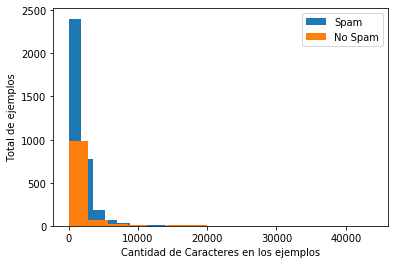

In [10]:
Spams = []
NoSpams = []
for spm in spam_messages:
    Spams.append(len(spm))
for hm in ham_messages:
    NoSpams.append(len(hm))
plt.hist(NoSpams, bins=25)
plt.hist(Spams, bins=10)
plt.legend(['Spam', 'No Spam'])
plt.xlabel('Cantidad de Caracteres en los ejemplos') 
plt.ylabel('Total de ejemplos') 
plt.show()

***Se crean los diccionarios de spam y ham, por tokens, para obtener la cantidad de repeticiones por palabra***

In [11]:
Palabras_Spam = {}

for mensaje in spam_messages:
    for token in nlp_es(mensaje.lower()):
        if(Palabras_Spam.get(token.text) == None):
            Palabras_Spam.setdefault(token.text, 1)
        else:
            Palabras_Spam[token.text] += 1

print(Palabras_Spam)

{'subject': 1255, ':': 4813, 'did': 49, 'you': 4110, 'complete': 103, 'this': 2379, '?': 875, ' ': 24854, 'free': 497, 'service': 148, 'mortgage': 62, 'rates': 61, 'have': 1123, 'never': 117, 'been': 280, 'lower': 34, '.': 16250, 'is': 2479, 'your': 2987, 'credit': 118, 'good': 185, 'get': 487, 'a': 3939, 'loan': 53, 'beyond': 5, 'wildest': 1, 'expectations': 45, '!': 2670, 'click': 428, 'here': 625, 'stinks': 1, 'lenders': 23, 'will': 1223, 'still': 59, 'give': 106, 'an': 670, 'absolutely': 40, 'amazing': 21, 'just': 417, 'and': 5499, 'started': 36, 'quote': 21, 'for': 2670, 'quick': 29, 'details': 70, 'corporate': 48, 'identity': 72, 'business': 737, 'image': 68, 'can': 768, 'say': 78, 'lot': 64, 'of': 4795, 'things': 61, 'about': 353, 'company': 693, 'contemporary': 21, 'rhythm': 21, 'life': 252, 'too': 82, 'dynamic': 22, 'sometimes': 30, 'it': 1323, 'takes': 46, 'oniy': 24, 'several': 80, 'seconds': 30, 'to': 6848, 'be': 1422, 'remembered': 22, 'or': 1341, 'lost': 33, 'among': 48, 

In [12]:
Palabras_Ham = {}

for mensaje in ham_messages:
    for token in nlp_es(mensaje.lower()):
        if(Palabras_Ham.get(token.text) == None):
            Palabras_Ham.setdefault(token.text, 1)
        else:
            Palabras_Ham[token.text] += 1

print(Palabras_Ham)

{'subject': 6845, ':': 33376, 're': 3040, 'message': 1105, 'from': 4163, 'ken': 145, 'rice': 648, ' ': 117672, 'dorothy': 30, ',': 39481, 'no': 746, 'problem': 288, '.': 58089, 'please': 3503, 'cc': 3070, '-': 77162, 'mail': 976, 'me': 3217, 'tom': 215, "'": 6693, 's': 4185, 'number': 601, 'one': 1197, 'of': 14495, 'the': 32943, 'members': 249, 'group': 1823, 'has': 1678, 'a': 12197, 'phd': 87, 'in': 11142, 'computer': 185, 'science': 51, 'and': 16865, 'he': 1639, 'will': 5368, 'join': 195, 'for': 10839, 'call': 998, 'vince': 6794, 'dalton': 14, '@': 11058, 'enron': 10537, 'communications': 791, 'on': 8784, '05': 776, '/': 29788, '01': 1319, '2001': 2404, '08': 935, '53': 102, 'am': 3818, 'to': 26755, 'j': 2934, 'kaminski': 3806, 'hou': 4427, 'ect': 9152, 'received': 381, 'through': 513, 'friend': 78, 'referral': 26, 'dr': 328, 'limperis': 8, '(': 6635, 'professor': 306, 'at': 4732, 'university': 786, 'michigan': 21, ')': 7219, 'developed': 107, 'statistical': 52, 'database': 138, 'man

***Se filtran los tokens menos frecuentes de los diccionarios, añadiendolos a uno nuevo y gráficando el resultado, para visualizar los tokens con mayor frecuencia de aparición.***

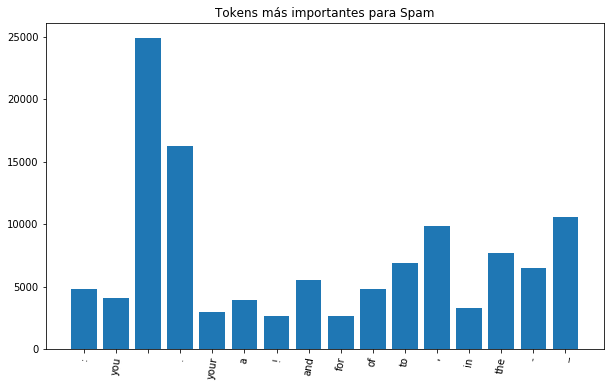

In [13]:
Palabras_Spam2 = {}
for clave, valor in zip(Palabras_Spam.keys(), Palabras_Spam.values()):
  if(valor >= 2500):
    Palabras_Spam2.setdefault(clave, valor)

plt.figure(figsize=(10,6))
plt.bar(Palabras_Spam2.keys(), Palabras_Spam2.values())
plt.title('Tokens más importantes para Spam') 
plt.xticks(rotation=80)
plt.show()

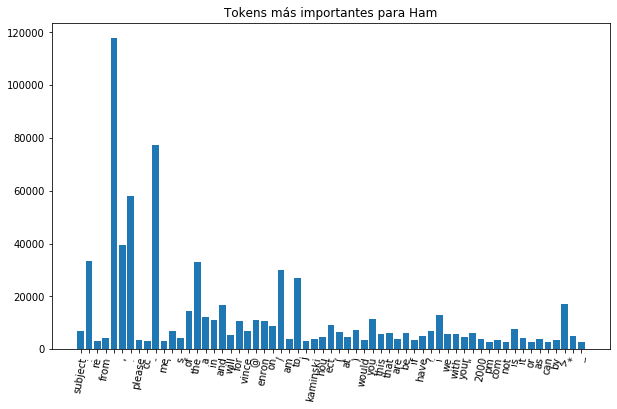

In [14]:
Palabras_Ham2 = {}
for clave, valor in zip(Palabras_Ham.keys(), Palabras_Ham.values()):
  if(valor >= 2500):
    Palabras_Ham2.setdefault(clave, valor)

plt.figure(figsize=(10,6))
plt.bar(Palabras_Ham2.keys(), Palabras_Ham2.values())
plt.title('Tokens más importantes para Ham') 
plt.xticks(rotation=80)
plt.show()

### Filtrando stop words

#### Para realizar el filtrado de stop words, o palabras que no nos den demasiada información, para la clasificación, importaremos el set correpondiente, del idioma inglés, de NLTK, además de los signos de puntuación que se filtrarán de la misma manera. Se pueden observar las palabras y la puntuación en la lista, pero de ser necesario, agregar más elementos, para hacer el filtro acuerde a las necesidades.

In [15]:
stop_words = set(stopwords.words('english')) 
stop_words.add('subject')
print((stop_words))

{'doesn', 'you', 'a', 'll', "you've", 'now', 'hasn', 'after', 'an', 'will', 'while', "didn't", 't', 'on', 'by', 'were', 'all', "hadn't", 'ourselves', 'should', 'most', "shan't", 'again', 'between', 'themselves', 'had', 'too', 'as', 'until', 'been', 'through', 'any', "isn't", 'is', 'off', 'against', 'from', "it's", 're', 'hers', 'just', 'being', 'itself', 'this', 'd', 'himself', 'didn', 'won', 'these', 'both', 'his', 'so', 'was', 'of', 'y', 'hadn', 'the', 'which', 'for', 'further', 'her', 'very', "don't", 'mustn', 'down', 'how', 'wasn', 'yourselves', 'be', 'they', 'over', 'their', 'above', 'ours', 'haven', 'i', 'below', 'into', 'when', 'o', 'if', 'm', "hasn't", "shouldn't", 'did', "couldn't", 'weren', "you're", 'some', 'there', 'or', 'that', 'has', 'your', 'because', 'ma', 'couldn', 'yours', 'she', 'before', 'subject', "that'll", 'such', 'only', "you'll", 'own', 'herself', 'my', "mightn't", "won't", 'shan', 'does', 'up', 'each', 'under', 'mightn', 'why', 'don', "should've", 'few', 'at',

In [16]:
puntuacion = list(string.punctuation)
puntuacion.extend(('``','0','1','2','3','4','5','6','7','8','9'))
print(puntuacion)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '``', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


***Una forma de realizar el filtrado de stop words y signos de puntación. Sin embargo, de esta manera, todas las palabras quedan en conjunto, por lo que al querer destokenizar las oraciones, se complicará.***

In [17]:
word_tokens_spam = word_tokenize(str(spam_messages_pr))  
filtered_sentence = [w for w in word_tokens_spam if not w in stop_words] 
words_spam=[i for i in filtered_sentence if i not in puntuacion]
print(words_spam[:1000]) 


['complete', 'free', 'service', 'mortgage', 'rates', 'never', 'lower', 'credit', 'good', 'get', 'loan', 'beyond', 'wildest', 'expectations', 'click', 'credit', 'stinks', 'lenders', 'still', 'give', 'absolutely', 'amazing', 'loan', 'click', 'click', 'get', 'started', 'absolutely', 'free', 'quote', 'click', 'quick', 'details', 'corporate', 'identity', 'business', 'corporate', 'image', 'say', 'lot', 'things', 'company', 'contemporary', 'rhythm', 'life', 'dynamic', 'sometimes', 'takes', 'oniy', 'several', 'seconds', 'company', 'remembered', 'lost', 'among', 'competitors', 'get', 'loqo', 'business', 'stationery', 'website', 'done', 'right', 'fast', 'turnaround', 'wiil', 'see', 'several', 'logo', 'variants', 'three', 'business', 'days', 'satisfaction', 'quaranteed', 'provide', 'unlimited', 'amount', 'changes', 'sure', 'meet', 'needs', 'fit', 'business', 'fiexibie', 'discounts', 'loqo', 'improvement', 'additionai', 'formats', 'bulk', 'orders', 'special', 'packages', 'creative', 'design', 'com

***Se realiza el filtrado de stop words y signos de puntuación, sin embargo, en esta etapa se va realizando de tal manera que se almacenan en uns lista que contiene todas las oraciones separadas, con la finalidad, de que en lo posterior se vuelvan a unir.***

In [18]:
oracion_spam=[]
words_spam=[]
for i in range(0,len(spam_messages_pr)):
    TMP=(word_tokenize(str(spam_messages_pr[i]))) 
    filtered_sentence=[]
    for w in TMP:
        #print(w)
        if not w in stop_words and w not in puntuacion:
            words_spam.append(w)
            filtered_sentence.append(w)
    #print(filtered_sentence)
    oracion_spam.append(filtered_sentence)
print(oracion_spam)

[['complete', 'free', 'service', 'mortgage', 'rates', 'never', 'lower', 'credit', 'good', 'get', 'loan', 'beyond', 'wildest', 'expectations', 'click', 'credit', 'stinks', 'lenders', 'still', 'give', 'absolutely', 'amazing', 'loan', 'click', 'click', 'get', 'started', 'absolutely', 'free', 'quote', 'click', 'quick', 'details'], ['corporate', 'identity', 'business', 'corporate', 'image', 'say', 'lot', 'things', 'company', 'contemporary', 'rhythm', 'life', 'dynamic', 'sometimes', 'takes', 'oniy', 'several', 'seconds', 'company', 'remembered', 'lost', 'among', 'competitors', 'get', 'loqo', 'business', 'stationery', 'website', 'done', 'right', 'fast', 'turnaround', 'wiil', 'see', 'several', 'logo', 'variants', 'three', 'business', 'days', 'satisfaction', 'quaranteed', 'provide', 'unlimited', 'amount', 'changes', 'sure', 'meet', 'needs', 'fit', 'business', 'fiexibie', 'discounts', 'loqo', 'improvement', 'additionai', 'formats', 'bulk', 'orders', 'special', 'packages', 'creative', 'design', '

***Se crea un diccionario de la lista creada anteriormente, con la finalidad de ver cuales con los tokens con mayor reelevancia o repeticiones en las oraciones. Se grafican unicamente aquellas con una cantidad de repeticiones mayor a 350.***

In [19]:
words_spam_dic={}
for i in words_spam:
    if(words_spam_dic.get(i) == None):
        words_spam_dic.setdefault(i, 1)
    else:
        words_spam_dic[i] = words_spam_dic[i] + 1    

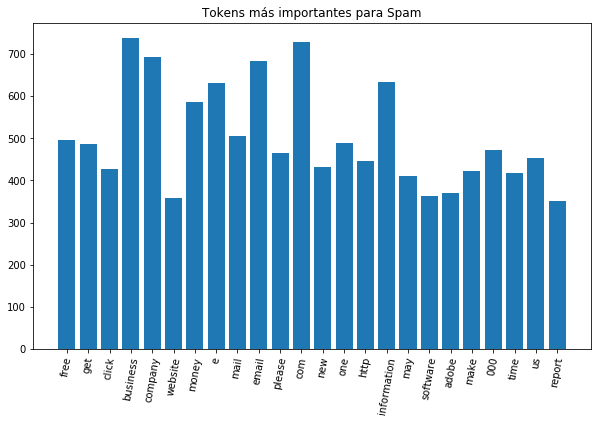

In [20]:
filtradas = {}
for clave, valor in zip(words_spam_dic.keys(), words_spam_dic.values()):
  if(valor >= 350):
    filtradas.setdefault(clave, valor)

# Ploteamos los elementos en el diccionario
plt.figure(figsize=(10,6))
plt.bar(filtradas.keys(), filtradas.values())
plt.title('Tokens más importantes para Spam') 
plt.xticks(rotation=80)
plt.show()

***El proceso realizado anteriormente con las oraicones de Spam, se repite pero con las de ham. Se repite el proceso de filtrado de los tokens por stop words y signos de puntuación, agrupandolos por sentencias en una lista. Se crea el diccionario correspondiente para las repeticiones y se grafica el mismo, solo para aquellos tokens con 1300 o más repeticiones.***

In [21]:
oracion_ham=[]
words_ham=[]
for i in range(0,len(ham_messages_pr)):
    TMP=(word_tokenize(str(ham_messages_pr[i]))) 
    filtered_sentence=[]
    for w in TMP:
        #print(w)
        if not w in stop_words and w not in puntuacion:
            words_ham.append(w)
            filtered_sentence.append(w)
    #print(filtered_sentence)
    oracion_ham.append(filtered_sentence)
print(words_ham[:100])

['message', 'ken', 'rice', 'dorothy', 'problem', 'please', 'cc', 'mail', 'tom', 'number', 'one', 'members', 'group', 'phd', 'computer', 'science', 'join', 'call', 'vince', 'dorothy', 'dalton', 'enron', 'communications', '05', '01', '2001', '08', '53', 'vince', 'j', 'kaminski', 'hou', 'ect', 'ect', 'cc', 'message', 'ken', 'rice', 'vince', 'ken', 'rice', 'received', 'call', 'friend', 'referral', 'dr', 'tom', 'limperis', 'professor', 'university', 'michigan', 'dr', 'limperis', 'developed', 'statistical', 'database', 'management', 'system', 'would', 'like', 'show', 'enron', 'ken', 'would', 'like', 'return', 'call', 'behalf', 'feels', 'probably', 'person', 'understand', 'able', 'determine', 'enron', 'interest', 'mind', 'returning', 'call', 'please', 'let', 'know', 'thanks', 'dorothy', 'dalton', 'office', 'chairman', 'enron', 'broadband', 'services', '1400', 'smith', 'street', 'eb', '4505', 'houston', 'tx', '77002', '713', '853']


In [22]:
words_ham_dic={}
for i in words_ham:
    if(words_ham_dic.get(i) == None):
        words_ham_dic.setdefault(i, 1)
    else:
        words_ham_dic[i] = words_ham_dic[i] + 1    

In [23]:
for key, value in sorted(words_ham_dic.items(), key=lambda kv: kv[1], reverse=True):
    print("%s: %s" % (key, value))

enron: 10537
ect: 9152
vince: 6794
hou: 4427
2000: 3973
kaminski: 3806
com: 3590
please: 3503
would: 3351
cc: 3070
j: 2934
pm: 2594
2001: 2404
research: 2142
thanks: 1999
know: 1851
group: 1823
10: 1795
time: 1756
energy: 1648
may: 1618
power: 1564
risk: 1515
let: 1469
like: 1450
new: 1431
00: 1396
shirley: 1376
meeting: 1343
11: 1339
corp: 1333
01: 1319
also: 1301
edu: 1266
e: 1262
houston: 1244
30: 1212
04: 1206
one: 1197
information: 1197
12: 1194
forwarded: 1186
need: 1167
get: 1158
us: 1107
message: 1105
forward: 1103
management: 1088
market: 1037
03: 1019
02: 1017
call: 998
work: 996
th: 991
model: 984
mail: 976
business: 970
crenshaw: 936
08: 935
regards: 927
conference: 926
year: 907
could: 900
713: 886
email: 884
development: 881
09: 880
week: 874
price: 861
contact: 855
see: 846
thank: 829
stinson: 819
john: 809
day: 802
finance: 798
communications: 791
http: 791
project: 789
think: 788
university: 786
look: 785
next: 779
05: 776
help: 768
interview: 760
fax: 749
sent: 747
:

networks: 38
ross: 38
computational: 38
portland: 38
lou: 38
pdx: 38
jest: 38
arthur: 38
target: 38
lost: 38
leach: 38
miss: 37
entitled: 37
gives: 37
disclosure: 37
specified: 37
logistics: 37
environmental: 37
traditional: 37
difficulties: 37
unique: 37
regulation: 37
arranged: 37
issued: 37
host: 37
reliance: 37
allowed: 37
300: 37
coal: 37
processing: 37
calculated: 37
interns: 37
wife: 37
pavel: 37
concern: 37
essential: 37
alliance: 37
aram: 37
francis: 37
spoken: 37
australia: 37
advisor: 37
community: 37
advice: 37
cumulative: 37
finalize: 37
cline: 37
contribute: 37
delete: 37
lotus: 37
indicate: 37
craig: 37
printer: 37
professors: 37
mbd: 37
linux: 37
banks: 36
ene: 36
monitor: 36
epsc: 36
rc: 36
paula: 36
rules: 36
dynamic: 36
shortly: 36
dependent: 36
instruments: 36
100038: 36
gatech: 36
son: 36
install: 36
story: 36
hoping: 36
georgia: 36
parking: 36
exit: 36
completely: 36
anderson: 36
roles: 36
jcc: 36
outstanding: 36
sharing: 36
missing: 36
898: 36
roman: 36
yannis: 3

cordially: 18
backgrounds: 18
adopted: 18
sellers: 18
challenging: 18
signing: 18
bay: 18
ibm: 18
suited: 18
algorithm: 18
gsia: 18
harvey: 18
servers: 18
fallon: 18
mmbtu: 18
skinner: 18
publish: 18
compaq: 18
cox: 18
terry: 18
corrections: 18
conflict: 18
queries: 18
portal: 18
placement: 18
shannon: 18
agnihotri: 18
designated: 18
ecth: 18
reliant: 18
rl: 18
appointment: 18
undergraduate: 18
lunches: 18
characteristics: 18
blachman: 18
kallipoleos: 18
20537: 18
cy: 18
1678: 18
nicosia: 18
357: 18
892261: 18
339063: 18
exports: 18
nww: 18
apodaca: 18
riskpublications: 18
qualifications: 18
bldg: 18
negotiated: 18
melissa: 18
warwick: 18
eurolds: 18
stories: 18
regression: 18
headed: 18
ee: 18
corrected: 18
contributed: 18
wp: 18
vous: 18
acquired: 18
operate: 18
pb: 18
nance: 18
dauphine: 18
nurit: 18
948: 18
rebecca: 18
angelika: 18
intrinsic: 18
kwi: 18
reinsurance: 18
desleigh: 18
6724: 17
revisions: 17
counsel: 17
incorporating: 17
reform: 17
benjamin: 17
agreeing: 17
mailed: 17


friendly: 9
dmitri: 9
496: 9
groves: 9
technological: 9
departmental: 9
assured: 9
tyler: 9
subscribers: 9
sealed: 9
suits: 9
litton: 9
helms: 9
wooddy: 9
trajectory: 9
processed: 9
tap: 9
mtm: 9
shut: 9
judy: 9
entertainment: 9
rfc: 9
rajan: 9
technique: 9
danielle: 9
calger: 9
perry: 9
elliot: 9
sf: 9
mining: 9
privileges: 9
timetable: 9
baby: 9
leventhal: 9
henahan: 9
exotics: 9
ref: 9
cd: 9
announcing: 9
slide: 9
ots: 9
3214: 9
tm: 9
forbes: 9
ngo: 9
buehler: 9
padron: 9
borne: 9
nicely: 9
eager: 9
appetite: 9
ourso: 9
arises: 9
computation: 9
mercur: 9
kemm: 9
tells: 9
rudy: 9
affecting: 9
lucent: 9
specialists: 9
moments: 9
pal: 9
heating: 9
humphreys: 9
qualitative: 9
spec: 9
surveys: 9
preprint: 9
illustrate: 9
correlated: 9
trac: 9
750: 9
efficiencies: 9
shore: 9
hoog: 9
reluctant: 9
centralized: 9
ann: 9
fgt: 9
unavailable: 9
fifth: 9
explanation: 9
marketplaces: 9
brainstorming: 9
796: 9
441: 9
recognition: 9
highlighted: 9
highlight: 9
globalization: 9
hanley: 9
denver: 9
j

ei: 5
cisco: 5
58714: 5
compiled: 5
tenure: 5
harvesting: 5
nws: 5
empty: 5
grids: 5
warehouse: 5
iteration: 5
witter: 5
jessica: 5
gustafson: 5
danielson: 5
macro: 5
wolfe: 5
swain: 5
removal: 5
nearest: 5
expires: 5
depend: 5
buckets: 5
resent: 5
tangible: 5
spite: 5
shaping: 5
braun: 5
analizy: 5
camoglu: 5
finals: 5
navigate: 5
elisabeth: 5
fortran: 5
macmilli: 5
pracy: 5
rozdzia: 5
hundreds: 5
aziz: 5
harrelson: 5
gained: 5
laboratory: 5
discover: 5
1986: 5
hat: 5
und: 5
bei: 5
boudreaux: 5
ranen: 5
swags: 5
ennron: 5
apartment: 5
pose: 5
6308: 5
0477: 5
859: 5
6361: 5
jgarven: 5
spouse: 5
civic: 5
rosemary: 5
149: 5
raises: 5
azure: 5
buffalo: 5
bayou: 5
shirts: 5
scout: 5
prizes: 5
experiments: 5
bucket: 5
180: 5
derive: 5
worldpower: 5
imposing: 5
ugh: 5
251: 5
kennedy: 5
billings: 5
283: 5
decrease: 5
7094: 5
thunderbird: 5
laws: 5
invites: 5
7267: 5
chartered: 5
formulation: 5
exhibits: 5
surprise: 5
counterparts: 5
inclined: 5
1947: 5
1930: 5
1944: 5
1945: 5
1949: 5
168: 5
0

mjaafar: 4
weijun: 4
fleet: 4
con: 4
citing: 4
manufacturers: 4
damaging: 4
msdw: 4
gdp: 4
tl: 4
whereas: 4
ningxiong: 4
veinott: 4
resultant: 4
virani: 4
ujjwal: 4
dey: 4
nilesh: 4
hazira: 4
inaccessible: 4
wd: 4
plateau: 4
navin: 4
sandherr: 4
releasing: 4
peng: 4
sms: 4
hyundai: 4
averaging: 4
buys: 4
bureaucrat: 4
nominees: 4
ptufano: 4
eurasia: 4
deloitte: 4
sung: 4
chile: 4
2038: 4
corteselli: 4
zco: 4
riskbrief: 4
ergnote: 4
retval: 4
wealth: 4
kearns: 4
novell: 4
gaap: 4
lewthwaite: 4
kal: 4
addendum: 4
rangel: 4
haddow: 4
kasravi: 4
russ: 4
resueme: 4
hochmuth: 4
corel: 4
gnome: 4
kde: 4
ooc: 4
worlds: 4
generates: 4
missy: 4
misha: 4
siegel: 4
zulie: 4
maggie: 4
valles: 4
donnis: 4
traylor: 4
raquel: 4
guerrero: 4
elsie: 4
longoria: 4
tagliarino: 4
dianne: 4
langeland: 4
gebhardt: 4
cuccia: 4
lewelling: 4
escamilla: 4
las: 4
villeral: 4
seal: 4
carryover: 4
hjm: 4
slam: 4
blow: 4
smart: 4
commercially: 4
retrofit: 4
yhol: 4
pwcglobal: 4
marron: 4
georgewbush: 4
solver: 4
thre

imageo: 3
erglib: 3
zhiyun: 3
voll: 3
chang: 3
tmat: 3
opttype: 3
xcelerator: 3
precip: 3
detailing: 3
levied: 3
radio: 3
confines: 3
10030: 3
doliver: 3
77042: 3
2016: 3
3836: 3
unambiguously: 3
appreciating: 3
subtlety: 3
fsa: 3
permanently: 3
dwivedi: 3
synergies: 3
riverboat: 3
koures: 3
jacobus: 3
haakon: 3
olafsson: 3
enbank: 3
giants: 3
staroffice: 3
koffice: 3
eigenvalue: 3
pagel: 3
explosive: 3
realization: 3
finite: 3
biorac: 3
uwage: 3
dnia: 3
zrobic: 3
tygodnie: 3
imprezy: 3
pomocy: 3
eog: 3
contributors: 3
oppose: 3
charitable: 3
valerie: 3
villareal: 3
displays: 3
lucia: 3
holders: 3
bucketing: 3
mckone: 3
osl: 3
translate: 3
yards: 3
cmo: 3
disputes: 3
authorisation: 3
emotions: 3
basu: 3
paunikar: 3
fis: 3
clarifying: 3
ranganathan: 3
hazare: 3
conveyed: 3
turbomachinery: 3
weir: 3
ieg: 3
9012: 3
1753: 3
6090: 3
mhhs: 3
keefe: 3
toomey: 3
precinct: 3
seethayya: 3
heidi: 3
terri: 3
lq: 3
tycholiz: 3
luce: 3
marcus: 3
hair: 3
welcomed: 3
7491: 3
tape: 3
faxing: 3
repay: 3

joshi: 2
corruption: 2
prithviraj: 2
undue: 2
compounded: 2
828: 2
formulated: 2
uneconomic: 2
faulty: 2
undertaken: 2
stops: 2
stood: 2
facilitator: 2
briarpark: 2
briarwood: 2
9515: 2
385: 2
iah: 2
dom: 2
dairy: 2
apartments: 2
browner: 2
alff: 2
peco: 2
682: 2
merged: 2
gwh: 2
5680: 2
628: 2
detroit: 2
southwestern: 2
alliant: 2
creditworthiness: 2
satisfies: 2
677: 2
chaxel: 2
chnage: 2
thursdays: 2
105764: 2
applets: 2
browsers: 2
realplayer: 2
unorganized: 2
disrupting: 2
158: 2
msmail: 2
2615: 2
redmond: 2
tijerina: 2
nicole: 2
enymex: 2
dynegydirect: 2
downloads: 2
6750: 2
314: 2
mun: 2
disputing: 2
intented: 2
760: 2
6773: 2
jseade: 2
circa: 2
partcipation: 2
nactivity: 2
eluding: 2
steakhouse: 2
positively: 2
socially: 2
theories: 2
newswire: 2
sleeve: 2
denim: 2
definetly: 2
oojavaformanagers: 2
dwight: 2
maxim: 2
enclosure: 2
engaging: 2
utilizes: 2
laurie: 2
merten: 2
cook: 2
carbonara: 2
866: 2
430928: 2
982: 2
zimmerman: 2
chuanli: 2
generalized: 2
classical: 2
filter: 2

czym: 2
godziny: 2
stosunku: 2
godzin: 2
przesle: 2
zadzwonic: 2
carries: 2
transmissions: 2
lans: 2
snia: 2
0923: 2
maurenn: 2
commonly: 2
bridgestation: 2
ernesto: 2
hernandez: 2
appearance: 2
applicability: 2
rollup: 2
jjw: 2
smud: 2
georgi: 2
marge: 2
stunning: 2
sabrina: 2
whaley: 2
polk: 2
hudler: 2
ledbetter: 2
rub: 2
proffesor: 2
constucting: 2
avalability: 2
monthlies: 2
dailies: 2
cantrell: 2
relocated: 2
bym: 2
midzynarodowych: 2
wraz: 2
doktora: 2
inwestycjami: 2
budow: 2
elektrowni: 2
hallway: 2
reclassification: 2
mulhouse: 2
drafts: 2
kornreich: 2
29415: 2
dispersion: 2
jot: 2
srf: 2
364463: 2
classification: 2
jenni: 2
jmccauley: 2
greiter: 2
miranda: 2
dhruv: 2
shielded: 2
inbox: 2
dallmann: 2
donuts: 2
anl: 2
ppco: 2
farrell: 2
excerpts: 2
plata: 2
2175: 2
ambroshia: 2
ear: 2
investinme: 2
loved: 2
rom: 2
factory: 2
thoughtfulness: 2
markham: 2
bpd: 2
seabreeze: 2
teppco: 2
propylene: 2
belvieu: 2
hms: 2
carpool: 2
grains: 2
omin: 2
councils: 2
reoccurring: 2
stampf: 

1412: 1
1413: 1
makovich: 1
0741: 1
2649: 1
overwhelmed: 1
leeway: 1
embarrassing: 1
clock: 1
unskilled: 1
immigrant: 1
toiling: 1
bunch: 1
tandem: 1
propaganda: 1
soul: 1
acceleration: 1
strategos: 1
mothers: 1
sensors: 1
reformatted: 1
motivates: 1
symptoms: 1
numbness: 1
limbs: 1
paralysis: 1
emotional: 1
surpassed: 1
supporter: 1
fundraiser: 1
counseling: 1
nmss: 1
000000000012734: 1
oddbj: 1
bremtun: 1
ebitda: 1
tweaking: 1
undersupported: 1
dicuss: 1
0447: 1
lightly: 1
atm: 1
0934: 1
catering: 1
csmitnick: 1
enet: 1
adenda: 1
toolset: 1
ozaidi: 1
0653: 1
pageable: 1
danapointharbor: 1
ptwend: 1
torrey: 1
pines: 1
jolla: 1
signup: 1
expedition: 1
humor: 1
reforward: 1
pcl: 1
displace: 1
hinderences: 1
httpd: 1
qaao: 1
2187: 1
woodrow: 1
chimney: 1
awarding: 1
lert: 1
florence: 1
denmark: 1
austria: 1
switzerland: 1
slovenia: 1
paving: 1
patchwork: 1
unresolved: 1
hasten: 1
heightened: 1
maneuvering: 1
alike: 1
spurring: 1
auctioned: 1
coveted: 1
interconnectors: 1
perpetrates: 1
p

bialki: 1
tatrzanskiej: 1
zakopanem: 1
tam: 1
podobalo: 1
gory: 1
naprawde: 1
piekne: 1
gorach: 1
bedziemy: 1
chcieli: 1
wpasc: 1
pabianic: 1
albo: 1
drodze: 1
powrotnej: 1
gdanska: 1
zapada: 1
wczesnie: 1
jezdzic: 1
nocy: 1
latwo: 1
mecze: 1
szybki: 1
zasypiam: 1
twoich: 1
dziewczyn: 1
wrzesniu: 1
przypominalem: 1
sobie: 1
stare: 1
czasy: 1
nocowalismy: 1
rodzicami: 1
ojciec: 1
siedzial: 1
lezaku: 1
jablonia: 1
ech: 1
minelo: 1
slyszalem: 1
wicusiowi: 1
idzie: 1
nadzwyczajnie: 1
pamietam: 1
jakim: 1
ulubienicem: 1
taty: 1
peptydy: 1
juracie: 1
michal: 1
swoja: 1
narzeczona: 1
wybiera: 1
lecie: 1
ameryki: 1
chcialby: 1
podszkolic: 1
popracowac: 1
oboje: 1
studiuja: 1
medycyne: 1
trzecim: 1
moglbys: 1
chcieliby: 1
chca: 1
niczym: 1
absorbowac: 1
znowu: 1
przyjemnoscia: 1
powiedziec: 1
poglady: 1
polityczne: 1
jadzi: 1
identyczne: 1
nawet: 1
poklocic: 1
generalnie: 1
zgadzam: 1
balcerowiczem: 1
reforma: 1
zdrowia: 1
doznajemy: 1
wlasnej: 1
skorze: 1
trzymajcie: 1
cieplo: 1
uslyszenia: 1


risch: 1
stenhouse: 1
serwin: 1
crissy: 1
collett: 1
adriana: 1
cortes: 1
leticia: 1
botello: 1
lacalli: 1
rios: 1
claudette: 1
chaun: 1
bachand: 1
originations: 1
inroads: 1
adoption: 1
pena: 1
fariba: 1
karimi: 1
krogmeier: 1
ihrig: 1
pedroza: 1
hagar: 1
kedem: 1
merriss: 1
courdney: 1
tammie: 1
schoppe: 1
lynna: 1
kacal: 1
johnna: 1
kokenge: 1
zisman: 1
cornett: 1
yeboah: 1
phi: 1
khanh: 1
carmen: 1
debuted: 1
beldin: 1
acknowledge: 1
resides: 1
mottom: 1
projecting: 1
intake: 1
approximations: 1
pdes: 1
katya: 1
ashe: 1
kashe: 1
2659: 1
574828: 1
communicates: 1
enthusiastically: 1
recorder: 1
discretized: 1
bookshop: 1
confer: 1
equivalence: 1
siddique: 1
jf: 1
paulukiewicz: 1
rqfa: 1
neutralized: 1
cite: 1
ordinationg: 1
penetration: 1
suvorov: 1
trialing: 1
handles: 1
hyper: 1
primal: 1
simplex: 1
mip: 1
dlls: 1
flaming: 1
sacchi: 1
eod: 1
excerpted: 1
preferencing: 1
abouts: 1
employs: 1
vod: 1
reviewmovies: 1
rosenkranz: 1
acacia: 1
solana: 1
92075: 1
4678: 1
3930: 1
exploitat

underweighting: 1
binge: 1
salaries: 1
funnel: 1
coffers: 1
grudging: 1
burst: 1
populist: 1
voter: 1
exploding: 1
horror: 1
shoulders: 1
emergence: 1
drama: 1
4311: 1
ith: 1
ni: 1
memories: 1
strictest: 1
jpt: 1
newsoussan: 1
iwon: 1
infrequently: 1
nomtxfellow: 1
62964: 1
telephones: 1
570: 1
6509: 1
theer: 1
leszek: 1
ewa: 1
travelled: 1
headhunters: 1
kk: 1
shoes: 1
mcgrath: 1
ensured: 1
aeecl: 1
29652: 1
10501: 1
xaao: 1
2258: 1
noxp: 1
22494: 1
mcrew: 1
personages: 1
philipps: 1
poconos: 1
ws: 1
underline: 1
anniversay: 1
5830: 1
degiancinto: 1
applicant: 1
knott: 1
commencing: 1
ype: 1
ntsc: 1
tohttp: 1
imgctr: 1
shea: 1
5418: 1
43162: 1
43163: 1
43164: 1
43165: 1
qcf: 1
prusuing: 1
goofed: 1
incorporation: 1
dchang: 1
5762: 1
resumeo: 1
peole: 1
2076: 1
optimality: 1
contiguity: 1
jealous: 1
rewritten: 1
mckinseyquarterly: 1
preceed: 1
reserving: 1
000000000003991: 1
spcialist: 1
readingyour: 1
ajo: 1
collegues: 1
1232: 1
fostering: 1
segmented: 1
industrials: 1
cogen: 1
intens

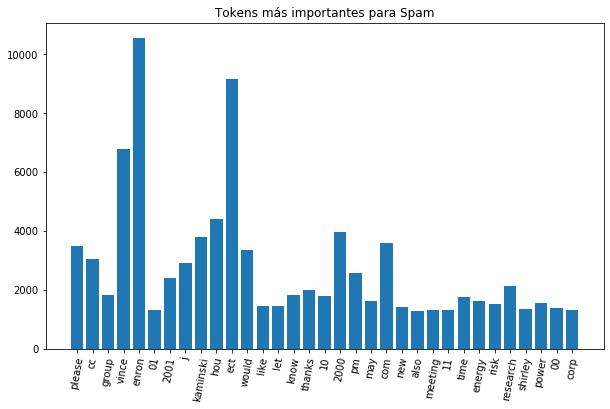

In [24]:
filtradas_ham = {}
for clave, valor in zip(words_ham_dic.keys(), words_ham_dic.values()):
  if(valor >= 1300):
    filtradas_ham.setdefault(clave, valor)

# Ploteamos los elementos en el diccionario
plt.figure(figsize=(10,6))
plt.bar(filtradas_ham.keys(), filtradas_ham.values())
plt.title('Tokens más importantes para Spam') 
plt.xticks(rotation=80)
plt.show()

# Lematizacion

***Otro proceso a realizar para el procesado del texto buscando encontrar las palabras que mejor ayduen a clasificar, sería la lemmatización, buscando llevar los tokens a su forma mas básica.***

In [25]:
words_lemma=[nlp_es(i) for i in words_spam]
print(str(words_lemma))

KeyboardInterrupt: 

***Se define el objeto lemmatizer con el que en las celdas siguientes, se realizará la correspondiente lematización de las oraciones, creando la lista con las oraciones transformadas.***

In [26]:
lemmatizer = WordNetLemmatizer()

In [27]:
oracion_spam_lema=[]
for rec in oracion_spam:
    pal_lem=[]
    for tmp in rec:
        lemtmp=lemmatizer.lemmatize(tmp)
        pal_lem.append(lemtmp)
    oracion_spam_lema.append(pal_lem)
print(oracion_spam_lema)

[['complete', 'free', 'service', 'mortgage', 'rate', 'never', 'lower', 'credit', 'good', 'get', 'loan', 'beyond', 'wildest', 'expectation', 'click', 'credit', 'stink', 'lender', 'still', 'give', 'absolutely', 'amazing', 'loan', 'click', 'click', 'get', 'started', 'absolutely', 'free', 'quote', 'click', 'quick', 'detail'], ['corporate', 'identity', 'business', 'corporate', 'image', 'say', 'lot', 'thing', 'company', 'contemporary', 'rhythm', 'life', 'dynamic', 'sometimes', 'take', 'oniy', 'several', 'second', 'company', 'remembered', 'lost', 'among', 'competitor', 'get', 'loqo', 'business', 'stationery', 'website', 'done', 'right', 'fast', 'turnaround', 'wiil', 'see', 'several', 'logo', 'variant', 'three', 'business', 'day', 'satisfaction', 'quaranteed', 'provide', 'unlimited', 'amount', 'change', 'sure', 'meet', 'need', 'fit', 'business', 'fiexibie', 'discount', 'loqo', 'improvement', 'additionai', 'format', 'bulk', 'order', 'special', 'package', 'creative', 'design', 'competitive', 'pr

In [28]:
oracion_ham_lema=[]
for rec in oracion_ham:
    pal_lem=[]
    for tmp in rec:
        lemtmp=lemmatizer.lemmatize(tmp)
        pal_lem.append(lemtmp)
    oracion_ham_lema.append(pal_lem)
print(oracion_ham_lema[:100])

[['message', 'ken', 'rice', 'dorothy', 'problem', 'please', 'cc', 'mail', 'tom', 'number', 'one', 'member', 'group', 'phd', 'computer', 'science', 'join', 'call', 'vince', 'dorothy', 'dalton', 'enron', 'communication', '05', '01', '2001', '08', '53', 'vince', 'j', 'kaminski', 'hou', 'ect', 'ect', 'cc', 'message', 'ken', 'rice', 'vince', 'ken', 'rice', 'received', 'call', 'friend', 'referral', 'dr', 'tom', 'limperis', 'professor', 'university', 'michigan', 'dr', 'limperis', 'developed', 'statistical', 'database', 'management', 'system', 'would', 'like', 'show', 'enron', 'ken', 'would', 'like', 'return', 'call', 'behalf', 'feel', 'probably', 'person', 'understand', 'able', 'determine', 'enron', 'interest', 'mind', 'returning', 'call', 'please', 'let', 'know', 'thanks', 'dorothy', 'dalton', 'office', 'chairman', 'enron', 'broadband', 'service', '1400', 'smith', 'street', 'eb', '4505', 'houston', 'tx', '77002', '713', '853', '6724', 'direct', '713', '853', '9469', 'fax'], ['b', 'brandfass'

words_lemma_spm=(lemmatizer.lemmatize(i) for i in words_spam)
words_lemma_spm=list(words_lemma_spm)
print(words_lemma_spm)

words_lemma_ham=(lemmatizer.lemmatize(i) for i in words_ham)
words_lemma_ham=list(words_lemma_ham)
print(words_lemma_ham[:100])

print(" ".join(words_lemma_ham[:2000]))

from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
detokenizer = Detok()
text = detokenizer.detokenize(words_lemma_ham)

print(text[:100000])

***Se replica el proceso realizado anteriormente, de agrupamiento en diccionario, para pdoer visualziar los cambios que hay en los tokens, después de haber realizado el proceso de lemmatización.***

enron: 10537
ect: 9152
vince: 6794
hou: 4427
2000: 3973
kaminski: 3806
com: 3590
please: 3503
would: 3351
cc: 3070
j: 2935
pm: 2594
2001: 2404
research: 2145
thanks: 1999
group: 1973
time: 1961
know: 1874
10: 1795
energy: 1653
may: 1619
risk: 1608
market: 1600
power: 1579
let: 1482
meeting: 1468
like: 1453
new: 1431
00: 1396
shirley: 1376
need: 1373
11: 1339
model: 1335
corp: 1333
price: 1320
01: 1319
u: 1317
also: 1301
year: 1293
e: 1274
edu: 1266
houston: 1244
one: 1226
30: 1212
04: 1206
information: 1197
get: 1196
12: 1194
forwarded: 1186
day: 1180
message: 1170
work: 1143
week: 1138
forward: 1109
management: 1089
option: 1089
business: 1064
call: 1028
project: 1019
03: 1019
02: 1017
conference: 1003
company: 994
th: 993
mail: 992
regard: 984
crenshaw: 936
08: 935
development: 933
interview: 921
email: 914
look: 906
could: 900
contact: 899
question: 890
713: 886
communication: 881
09: 880
make: 859
see: 859
thank: 829
stinson: 819
university: 813
presentation: 813
john: 813
think: 8

35383: 48
conflict: 48
keeping: 48
opening: 48
wade: 48
griebling: 48
symposium: 48
725: 48
slot: 48
hickerson: 48
garven: 48
karen: 48
subsidiary: 48
double: 48
memory: 48
bridge: 48
esmtp: 48
281: 47
whatever: 47
sponsor: 47
alliance: 47
significantly: 47
pam: 47
regulation: 47
southern: 47
parent: 47
considering: 47
till: 47
tariff: 47
liquid: 47
ercot: 47
jack: 47
ze: 47
charlene: 47
hiring: 47
rsvp: 47
introduce: 47
268: 47
compensation: 47
en: 47
color: 47
bnp: 47
efficient: 46
park: 46
guess: 46
scope: 46
harvard: 46
hamilton: 46
wind: 46
prepared: 46
integration: 46
traded: 46
metric: 46
5073: 46
edison: 46
court: 46
joint: 46
downtown: 46
ganjoo: 46
spent: 46
define: 46
impressed: 46
continued: 46
club: 46
jennifer: 46
stewart: 46
reception: 46
oliver: 46
copier: 46
rly: 46
001: 46
barbara: 45
intranet: 45
briefly: 45
iii: 45
degree: 45
changing: 45
melinda: 45
immediate: 45
seyfried: 45
framework: 45
gone: 45
indian: 45
went: 45
escrow: 45
negative: 45
implied: 45
trial: 45
q

brook: 21
validation: 21
riskcalc: 21
gros: 21
ol: 21
announces: 21
publishing: 21
gene: 21
snapshot: 21
apparent: 21
idg: 21
spradling: 21
1892: 21
ets: 21
intend: 21
fa: 21
jak: 21
czy: 21
nyc: 21
gmt: 21
pacific: 21
jingming: 21
ne: 21
nezi: 21
exl: 21
ghosh: 21
wgo: 21
texaco: 20
faiz: 20
fail: 20
amendment: 20
regression: 20
althea: 20
palo: 20
enrollment: 20
restriction: 20
goldman: 20
dissemination: 20
ap: 20
carefully: 20
eg: 20
investigate: 20
indication: 20
contractor: 20
stake: 20
vilasrao: 20
cleared: 20
projection: 20
declined: 20
coordinating: 20
sick: 20
movie: 20
reprint: 20
doubletree: 20
1000: 20
depth: 20
dial: 20
232: 20
ancillary: 20
ziplip: 20
offset: 20
separately: 20
diego: 20
listing: 20
secondary: 20
fly: 20
risky: 20
accurately: 20
christopher: 20
engine: 20
domestic: 20
insead: 20
shakeout: 20
225: 20
polish: 20
reader: 20
memorial: 20
appreciation: 20
72: 20
llc: 20
coast: 20
beta: 20
penalty: 20
93: 20
spec: 20
ran: 20
finalizing: 20
anticipated: 20
demons

tm: 9
forbes: 9
ngo: 9
buehler: 9
gamble: 9
padron: 9
borne: 9
nicely: 9
eager: 9
appetite: 9
ourso: 9
arises: 9
shirt: 9
mercur: 9
kemm: 9
rudy: 9
affecting: 9
studio: 9
lucent: 9
technician: 9
pal: 9
heating: 9
humphreys: 9
qualitative: 9
temp: 9
anomaly: 9
preprint: 9
illustrate: 9
interviewee: 9
correlated: 9
trac: 9
fear: 9
750: 9
smile: 9
hoog: 9
accountant: 9
reluctant: 9
centralized: 9
glass: 9
ann: 9
fgt: 9
unavailable: 9
fifth: 9
brainstorming: 9
796: 9
441: 9
recognition: 9
highlighted: 9
globalization: 9
invitee: 9
hanley: 9
denver: 9
jordan: 9
wanting: 9
houstonenergy: 9
berry: 9
sullivan: 9
rising: 9
handled: 9
coursework: 9
kerr: 9
queensland: 9
dziekuje: 9
pomoc: 9
dla: 9
0207: 9
attracting: 9
robin: 9
olson: 9
suzanne: 9
distinguished: 9
martha: 9
szopa: 9
rush: 9
salad: 9
shively: 9
upward: 9
affiliation: 9
oscillation: 9
brainstorm: 9
4045: 9
intrigued: 9
carter: 9
eligibility: 9
applicant: 9
hull: 9
ou: 9
sufficiently: 9
tip: 9
mentor: 9
carla: 9
careful: 9
causing:

claremont: 6
glownej: 6
handlowej: 6
072700: 6
nag: 6
chelmsford: 6
pechersky: 6
yy: 6
scicomp: 6
fileplan: 6
4505: 5
9469: 5
firstly: 5
comprises: 5
credible: 5
commentary: 5
stuck: 5
minus: 5
bonnie: 5
mexican: 5
alford: 5
fornaio: 5
416: 5
iowa: 5
shield: 5
accessed: 5
170: 5
continually: 5
consuming: 5
costly: 5
validate: 5
roof: 5
ninfa: 5
unsolicited: 5
coc: 5
yale: 5
british: 5
beau: 5
bau: 5
bou: 5
brigham: 5
canfibre: 5
cfgl: 5
carrizo: 5
crzo: 5
crown: 5
croe: 5
cynet: 5
cyne: 5
cypress: 5
cyz: 5
idf: 5
ihii: 5
inland: 5
inln: 5
kafus: 5
nakornthai: 5
nsm: 5
paladin: 5
plr: 5
ld: 5
pgeof: 5
plg: 5
qsri: 5
kwk: 5
saxon: 5
sxn: 5
startech: 5
seh: 5
syntroleum: 5
synm: 5
tejon: 5
trc: 5
titan: 5
transcoastal: 5
tcms: 5
31939: 5
enhancing: 5
intangible: 5
decent: 5
portcalc: 5
ordinate: 5
diffserv: 5
everywhere: 5
shreve: 5
invaluable: 5
175: 5
liffe: 5
manipulating: 5
breaker: 5
plaza: 5
sunny: 5
announcerev: 5
lucy: 5
disappear: 5
logged: 5
cone: 5
safety: 5
arguijo: 5
ravindra

hyundai: 4
averaging: 4
ptufano: 4
eurasia: 4
eigenvalue: 4
deloitte: 4
sung: 4
chile: 4
2038: 4
corteselli: 4
zco: 4
riskbrief: 4
ergnote: 4
retval: 4
wealth: 4
kearns: 4
novell: 4
gaap: 4
lewthwaite: 4
kal: 4
addendum: 4
rangel: 4
haddow: 4
kasravi: 4
rus: 4
resueme: 4
hochmuth: 4
corel: 4
gnome: 4
kde: 4
ooc: 4
generates: 4
missy: 4
misha: 4
siegel: 4
zulie: 4
maggie: 4
valles: 4
donnis: 4
traylor: 4
raquel: 4
guerrero: 4
elsie: 4
longoria: 4
tagliarino: 4
dianne: 4
langeland: 4
gebhardt: 4
cuccia: 4
lewelling: 4
escamilla: 4
villeral: 4
seal: 4
carryover: 4
hjm: 4
slam: 4
blow: 4
smart: 4
commercially: 4
yhol: 4
pwcglobal: 4
marron: 4
georgewbush: 4
solver: 4
0191: 4
qualifying: 4
jitendra: 4
dram: 4
24962: 4
rercruiting: 4
effot: 4
wmo: 4
indonesia: 4
smi: 4
peoplefinder: 4
bernie: 4
dexter: 4
founding: 4
elective: 4
ib: 4
safely: 4
semiconductor: 4
encorp: 4
wolfram: 4
shockwave: 4
diverted: 4
classroom: 4
ablx: 4
buyback: 4
keeper: 4
39189: 4
3991: 4
smikle: 4
eeos: 4
imccracken

nepco: 3
biotechnology: 3
improves: 3
outweigh: 3
cited: 3
tradeweather: 3
rminto: 3
waive: 3
imageo: 3
erglib: 3
zhiyun: 3
voll: 3
chang: 3
tmat: 3
opttype: 3
xcelerator: 3
precip: 3
detailing: 3
levied: 3
radio: 3
pipe: 3
confines: 3
10030: 3
doliver: 3
77042: 3
2016: 3
3836: 3
unambiguously: 3
appreciating: 3
subtlety: 3
fsa: 3
designation: 3
permanently: 3
dwivedi: 3
riverboat: 3
koures: 3
jacobus: 3
haakon: 3
olafsson: 3
enbank: 3
staroffice: 3
koffice: 3
pagel: 3
explosive: 3
finite: 3
biorac: 3
uwage: 3
dnia: 3
zrobic: 3
tygodnie: 3
imprezy: 3
pomocy: 3
eog: 3
fraction: 3
oppose: 3
voter: 3
charitable: 3
valerie: 3
villareal: 3
lucia: 3
bucketing: 3
mckone: 3
osl: 3
translate: 3
yard: 3
cmo: 3
authorisation: 3
emotion: 3
contention: 3
basu: 3
paunikar: 3
fis: 3
clarifying: 3
ranganathan: 3
hazare: 3
conveyed: 3
niche: 3
turbomachinery: 3
weir: 3
ieg: 3
9012: 3
1753: 3
6090: 3
mhhs: 3
keefe: 3
toomey: 3
precinct: 3
seethayya: 3
heidi: 3
terri: 3
lq: 3
tycholiz: 3
luce: 3
marcus: 

stood: 2
disconnection: 2
suspension: 2
briarpark: 2
briarwood: 2
9515: 2
385: 2
iah: 2
dom: 2
dairy: 2
directive: 2
browner: 2
alff: 2
peco: 2
682: 2
merged: 2
gwh: 2
5680: 2
628: 2
detroit: 2
southwestern: 2
alliant: 2
creditworthiness: 2
satisfies: 2
677: 2
chaxel: 2
chnage: 2
105764: 2
realplayer: 2
unorganized: 2
disrupting: 2
158: 2
msmail: 2
2615: 2
redmond: 2
tijerina: 2
nicole: 2
enymex: 2
dynegydirect: 2
downloads: 2
6750: 2
314: 2
mun: 2
disputing: 2
intented: 2
760: 2
6773: 2
jseade: 2
circa: 2
partcipation: 2
nactivity: 2
eluding: 2
steakhouse: 2
positively: 2
socially: 2
newswire: 2
sleeve: 2
denim: 2
definetly: 2
oojavaformanagers: 2
dwight: 2
maxim: 2
engaging: 2
utilizes: 2
laurie: 2
merten: 2
cook: 2
carbonara: 2
866: 2
430928: 2
982: 2
zimmerman: 2
chuanli: 2
generalized: 2
notion: 2
classical: 2
filter: 2
kromer: 2
britta: 2
bothe: 2
clue: 2
profiteering: 2
swallow: 2
desirable: 2
haircut: 2
coinvested: 2
coinvest: 2
ries: 2
longexecsum: 2
modelvar: 2
texan: 2
mgt: 

ujn: 2
195: 2
supreme: 2
petitioner: 2
narration: 2
epilogue: 2
disseminated: 2
fourteen: 2
offtake: 2
tata: 2
disinformation: 2
resolutely: 2
torrent: 2
ahmedabad: 2
surat: 2
ugly: 2
abreo: 2
ostdeik: 2
raved: 2
handbook: 2
ejv: 2
freddie: 2
pertained: 2
feas: 2
makevc: 2
waggenspack: 2
seaborg: 2
mendiola: 2
1140: 2
northbound: 2
durant: 2
8320: 2
1034: 2
7252: 2
1645: 2
1543: 2
essay: 2
landman: 2
8147: 2
coefficient: 2
isaac: 2
pandya: 2
detmering: 2
lord: 2
haal: 2
happiness: 2
statue: 2
drury: 2
ensurance: 2
circular: 2
spc: 2
designer: 2
manufacture: 2
thyristors: 2
specializes: 2
vetters: 2
39435: 2
30423: 2
dependable: 2
saltiel: 2
beverage: 2
6978: 2
zeebrugge: 2
9001: 2
cardmembers: 2
jackups: 2
jackup: 2
reserach: 2
symbolic: 2
numeric: 2
interactively: 2
stereo: 2
bitmap: 2
scroll: 2
assemblyman: 2
bondholder: 2
payer: 2
cannon: 2
verified: 2
troubleshooting: 2
cgi: 2
questionaires: 2
valdes: 2
tartakowski: 2
nonexistent: 2
eresume: 2
candidacy: 2
mccracken: 2
iancv: 2
sto

5485: 1
5701: 1
3914: 1
9737: 1
6615: 1
6286: 1
renumbered: 1
hurredly: 1
misnumbered: 1
2964: 1
2970: 1
2971: 1
expound: 1
cordinating: 1
densley: 1
mccoppin: 1
andre: 1
beskrowni: 1
babbar: 1
nyegaard: 1
sushi: 1
married: 1
swedish: 1
conception: 1
unvalidated: 1
wince: 1
5005: 1
intervew: 1
attacment: 1
jam: 1
wkgrp: 1
hivol: 1
aco: 1
winzip: 1
informationon: 1
sbscriptions: 1
8999: 1
9997: 1
panamsat: 1
greenwich: 1
oskar: 1
uchicago: 1
hakeem: 1
sanusi: 1
576: 1
hsanusi: 1
jlieskov: 1
cultivate: 1
nietcho: 1
2598: 1
rocco: 1
paduano: 1
742: 1
2085: 1
rpaduano: 1
vainstein: 1
266: 1
7257: 1
samuva: 1
6999: 1
dsilva: 1
neeley: 1
unlawful: 1
appolized: 1
redone: 1
appts: 1
seesions: 1
labhart: 1
13662: 1
estutenwsl: 1
methodolgies: 1
intertemporal: 1
interregional: 1
cournot: 1
speediest: 1
duplicated: 1
toss: 1
chinowee: 1
motivational: 1
unles: 1
summar: 1
etd: 1
inexperienced: 1
har: 1
tho: 1
pvt: 1
nariman: 1
charlotte: 1
fennebresque: 1
swindell: 1
skadden: 1
arp: 1
trinity: 1
l

ssmb: 1
864: 1
3651: 1
341: 1
3037: 1
trimming: 1
divine: 1
goodness: 1
chrisman: 1
933: 1
7833: 1
copeland: 1
rooster: 1
608831: 1
2761: 1
976: 1
xaol: 1
0923182: 1
jakubik: 1
yzaguirre: 1
dumont: 1
marsha: 1
schiller: 1
elbertson: 1
mayer: 1
tonai: 1
lehr: 1
alcantara: 1
yolanda: 1
doan: 1
pilar: 1
cerezo: 1
terrellyn: 1
dusty: 1
warren: 1
paez: 1
nicki: 1
daw: 1
carroll: 1
venita: 1
usernames: 1
enroninternal: 1
enrondirectfinace: 1
9438: 1
5629: 1
thereon: 1
theintended: 1
accrue: 1
7117: 1
7731: 1
phenomenology: 1
supersymmetry: 1
eiu: 1
rch: 1
jsp: 1
newsbyemail: 1
tencel: 1
octane: 1
disadvantaged: 1
philippov: 1
novosibirsk: 1
containment: 1
vigne: 1
beverly: 1
hasenjager: 1
weaver: 1
paulette: 1
obrecht: 1
weber: 1
438: 1
binney: 1
cherri: 1
duhon: 1
984: 1
9022360: 1
1038711: 1
distriutions: 1
pareto: 1
evanece: 1
contagion: 1
nonparametric: 1
pursuit: 1
discretization: 1
multivariate: 1
arch: 1
kalman: 1
enery: 1
ecm: 1
auditable: 1
zmin: 1
57004: 1
loike: 1
statute: 1
postp

devoting: 1
fielding: 1
bauer: 1
334: 1
6011: 1
supergoal: 1
kungfu: 1
sccs: 1
effdate: 1
clust: 1
makefile: 1
excuteables: 1
fraud: 1
fannie: 1
mae: 1
jeopardy: 1
cagan: 1
finkelstein: 1
crevier: 1
treacy: 1
ashish: 1
hickman: 1
opet: 1
recode: 1
whittaker: 1
rearranged: 1
syllabus: 1
decison: 1
dpl: 1
smack: 1
bombastic: 1
modificaitons: 1
kristi: 1
urm: 1
4563: 1
mediacast: 1
mediatransport: 1
crowder: 1
tivioli: 1
emc: 1
midland: 1
darrel: 1
miramonte: 1
94306: 1
pnl: 1
phoned: 1
8687: 1
hughston: 1
vetoed: 1
recount: 1
bayne: 1
precedure: 1
clik: 1
exotical: 1
felipe: 1
overhauled: 1
reinstating: 1
voila: 1
gut: 1
wyslalem: 1
nasza: 1
razem: 1
kilkoma: 1
pracami: 1
matematyczno: 1
finansowo: 1
energetycznymi: 1
egzemplarze: 1
terminowego: 1
ktorym: 1
dzial: 1
poswiecony: 1
rynkowi: 1
redaktorem: 1
alek: 1
ksiazka: 1
zainteresowany: 1
recenzowany: 1
angielskiej: 1
sciagnac: 1
strony: 1
rweron: 1
angielski: 1
slaby: 1
tlumaczyla: 1
studentka: 1
czytac: 1
ostatecznej: 1
planujemy: 1


discretized: 1
bookshop: 1
confer: 1
equivalence: 1
siddique: 1
jf: 1
paulukiewicz: 1
rqfa: 1
neutralized: 1
ordinationg: 1
penetration: 1
suvorov: 1
trialing: 1
hyper: 1
primal: 1
simplex: 1
mip: 1
dlls: 1
flaming: 1
sacchi: 1
eod: 1
excerpted: 1
preferencing: 1
abouts: 1
vod: 1
reviewmovies: 1
rosenkranz: 1
acacia: 1
solana: 1
92075: 1
4678: 1
3930: 1
exploitation: 1
tecnomare: 1
circulating: 1
9283: 1
33092: 1
978: 1
atility: 1
magenta: 1
spotlight: 1
gavin: 1
souter: 1
crain: 1
policyholder: 1
abundant: 1
stifling: 1
gerling: 1
indexable: 1
surrogate: 1
bce: 1
oldest: 1
hampered: 1
swapping: 1
chiefly: 1
reinsured: 1
warranty: 1
triggered: 1
totaling: 1
cedents: 1
depletion: 1
flurry: 1
cincinnati: 1
tucson: 1
nutshell: 1
sava: 1
1145: 1
318: 1
291: 1
247: 1
kendrick: 1
rchahal: 1
es: 1
701: 1
6692: 1
asistant: 1
taichi: 1
cdsstrat: 1
skyline: 1
limeharbour: 1
t: 1
phn: 1
9628: 1
538: 1
5781: 1
transportion: 1
caltech: 1
arrangments: 1
suitably: 1
customised: 1
marco: 1
verreschi: 

incrementally: 1
disbanded: 1
environmentally: 1
commended: 1
admirably: 1
reconstitute: 1
punch: 1
meandering: 1
usurp: 1
amer: 1
lynnette: 1
ibrahim: 1
grime: 1
keene: 1
kingerski: 1
lima: 1
neustaedter: 1
331: 1
amoung: 1
rhartfi: 1
530: 1
734: 1
ftenergy: 1
iu: 1
896: 1
2282: 1
farthest: 1
rajwani: 1
jigsaw: 1
witness: 1
polling: 1
unsub: 1
inconvienence: 1
expereince: 1
bulid: 1
apologetic: 1
separator: 1
hamd: 1
ydo: 1
176: 1
kaao: 1
0361: 1
qualcomm: 1
varseml: 1
7467: 1
cust: 1
serv: 1
932: 1
2732: 1
hedger: 1
amazingly: 1
linearly: 1
minimising: 1
smoothness: 1
brainpower: 1
geoge: 1
gau: 1
marchesi: 1
vojislav: 1
maksimovic: 1
warga: 1
weisbach: 1
pacificare: 1
radioshack: 1
pepsi: 1
whirlpool: 1
airgas: 1
prelimnary: 1
shireley: 1
vanbeyrer: 1
2938: 1
21960: 1
bf: 1
anecdote: 1
doable: 1
surpass: 1
campaigner: 1
generously: 1
fragmented: 1
optimizes: 1
extracted: 1
wasaff: 1
elektro: 1
transportadora: 1
tgs: 1
transwestern: 1
beaumont: 1
sugarland: 1
epo: 1
copayment: 1
item

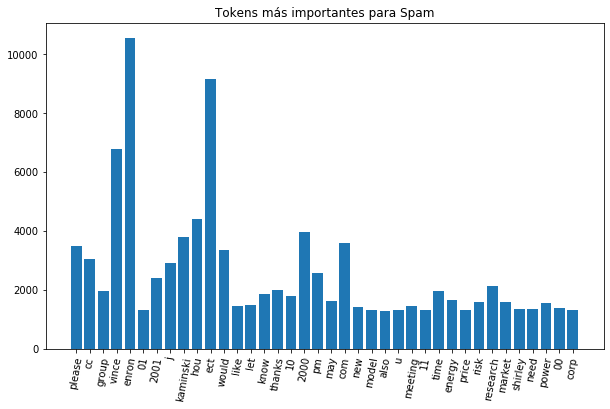

In [29]:
words_ham_lema_dic={}
for j in oracion_ham_lema:
    for i in j:
        if(words_ham_lema_dic.get(i) == None):
            words_ham_lema_dic.setdefault(i, 1)
        else:
            words_ham_lema_dic[i] = words_ham_lema_dic[i] + 1 
for key, value in sorted(words_ham_lema_dic.items(), key=lambda kv: kv[1], reverse=True):
    print("%s: %s" % (key, value)) 
filtradas_ham_lema = {}
for clave, valor in zip(words_ham_lema_dic.keys(), words_ham_lema_dic.values()):
  if(valor >= 1300):
    filtradas_ham_lema.setdefault(clave, valor)

# Ploteamos los elementos en el diccionario
plt.figure(figsize=(10,6))
plt.bar(filtradas_ham_lema.keys(), filtradas_ham_lema.values())
plt.title('Tokens más importantes para Spam') 
plt.xticks(rotation=80)
plt.show()

company: 923
business: 779
email: 728
com: 728
e: 670
information: 639
u: 625
money: 587
mail: 570
get: 505
free: 497
one: 496
000: 472
time: 468
please: 466
http: 450
make: 449
report: 445
new: 432
click: 430
may: 411
order: 399
price: 399
website: 393
address: 386
security: 378
adobe: 371
list: 367
offer: 367
day: 363
software: 362
site: 355
message: 342
www: 329
need: 328
account: 324
service: 323
10: 323
want: 320
year: 318
people: 315
program: 308
statement: 296
name: 295
within: 293
investment: 293
best: 287
2005: 287
stock: 283
like: 281
00: 277
product: 276
life: 270
see: 270
market: 270
million: 269
system: 269
receive: 268
online: 268
send: 268
use: 261
work: 257
future: 245
home: 238
net: 235
take: 232
save: 232
r: 232
way: 228
marketing: 226
l: 226
would: 223
received: 221
also: 221
internet: 220
know: 218
customer: 213
mailing: 211
technology: 209
could: 207
available: 206
today: 204
logo: 203
95: 202
made: 202
web: 200
right: 196
state: 196
help: 194
industry: 194
week: 1

correspondence: 14
prepare: 14
invitation: 14
hotmail: 14
manner: 14
leave: 14
speed: 14
op: 14
downline: 14
mass: 14
43: 14
extreme: 14
na: 14
basic: 14
thus: 14
conversion: 14
hold: 14
forecast: 14
formula: 14
ticket: 14
nation: 14
developer: 14
lack: 14
smart: 14
provider: 14
218: 14
sharing: 14
aof: 14
omit: 14
therein: 14
verge: 14
ao: 14
advisory: 14
traded: 14
launch: 14
community: 14
nature: 14
confidence: 14
phoenix: 14
radio: 14
weil: 14
chain: 14
aiberta: 14
86: 14
david: 14
aol: 14
promote: 14
171: 14
torre: 14
extension: 13
pagemaker: 13
buiider: 13
impossible: 13
trying: 13
incredible: 13
proper: 13
forget: 13
procedure: 13
employment: 13
actually: 13
regulation: 13
coach: 13
seminar: 13
im: 13
export: 13
abroad: 13
remain: 13
discus: 13
otcbb: 13
hidden: 13
reservoir: 13
region: 13
solely: 13
proof: 13
successfully: 13
probably: 13
personally: 13
anybody: 13
maximum: 13
quite: 13
whose: 13
mailed: 13
inexpensive: 13
larger: 13
chicago: 13
population: 13
passed: 13
washin

van: 4
77: 4
carl: 4
emover: 4
beginning: 4
isoverwheiminq: 4
culture: 4
funded: 4
generous: 4
beauty: 4
entrust: 4
atm: 4
194: 4
83: 4
242: 4
stox: 4
xinhua: 4
restricted: 4
830: 4
xml: 4
irm: 4
preformatted: 4
768: 4
encrypt: 4
868: 4
foremost: 4
498: 4
candidate: 4
earliest: 4
aircraft: 4
elimination: 4
flight: 4
freelotto: 4
protocol: 4
ii: 4
passport: 4
tal: 4
solid: 4
typically: 4
twice: 4
collecting: 4
retire: 4
medzonli: 4
confi: 4
dentiaiity: 4
salary: 4
jobgalleriescom: 4
widely: 4
residence: 4
quotation: 4
230: 4
java: 4
bay: 4
postion: 4
mitsubishi: 4
ri: 4
wv: 4
billing: 4
maintenance: 4
861: 4
gtts: 4
discussed: 4
surprisingly: 4
mainstream: 4
poker: 4
betting: 4
translated: 4
indepth: 4
editor: 4
independently: 4
bernard: 4
compliment: 4
thai: 4
residing: 4
wave: 4
bangkok: 4
hitch: 4
endeavour: 4
appreciated: 4
lllustrator: 4
universe: 4
fiim: 4
headquarters: 4
compiete: 4
paradigm: 4
embracing: 4
inciudes: 4
seize: 4
ack: 4
abel: 4
dedication: 4
quadra: 4
masterdisk: 4

verlfied: 2
merchandise: 2
maui: 2
loop: 2
stringent: 2
repaid: 2
taxable: 2
collateral: 2
signer: 2
unpredictable: 2
spite: 2
perception: 2
grocery: 2
childcare: 2
tutoring: 2
extracurricular: 2
replacing: 2
nursery: 2
secondary: 2
shortest: 2
inevitable: 2
congressional: 2
mandate: 2
announcing: 2
applying: 2
sought: 2
counseling: 2
courtesy: 2
homeownership: 2
hispanic: 2
jewish: 2
catholic: 2
underemployed: 2
tuition: 2
insist: 2
sweeten: 2
tutorial: 2
glossary: 2
mock: 2
gasoline: 2
appliance: 2
heating: 2
worksheet: 2
separately: 2
feasibility: 2
adapt: 2
simplest: 2
invention: 2
constructing: 2
amazingly: 2
afast: 2
frill: 2
succeeding: 2
fayad: 2
sheik: 2
tenure: 2
crude: 2
evacuate: 2
committe: 2
embassy: 2
unserviceable: 2
proceeds: 2
incidental: 2
nb: 2
bomb: 2
698: 2
063: 2
nowz: 2
schlumberger: 2
slb: 2
baker: 2
bhi: 2
seismic: 2
maximize: 2
contractual: 2
bidding: 2
shell: 2
philip: 2
icon: 2
puerto: 2
rico: 2
guam: 2
dy: 2
feast: 2
mercy: 2
healing: 2
loaded: 2
conceit: 

shining: 1
00971: 1
2443308: 1
luma: 1
captured: 1
grateful: 1
tynisha: 1
2312: 1
usdl: 1
taxation: 1
liasion: 1
spirited: 1
behaved: 1
conversation: 1
monologue: 1
5056: 1
sic: 1
broadcasting: 1
288: 1
6661: 1
hwjw: 1
plea: 1
1658999: 1
xgab: 1
breakthroughrepair: 1
uexugthat: 1
uexug: 1
reuben: 1
539: 1
5327: 1
keystone: 1
92614: 1
zoo: 1
crowd: 1
concealing: 1
steal: 1
wong: 1
71819: 1
kowloon: 1
veronneau: 1
70058: 1
laval: 1
quebec: 1
francis: 1
kidd: 1
homestead: 1
15120: 1
frayser: 1
61432: 1
33906: 1
stone: 1
evans: 1
pearl: 1
75201: 1
jodyin: 1
thanx: 1
freebie: 1
sinatown: 1
decent: 1
cleaned: 1
gardening: 1
cloudhaven: 1
beprocessed: 1
offall: 1
tijqsemw: 1
greenspan: 1
xipwtobnf: 1
shouted: 1
joyfully: 1
witnessed: 1
marvelous: 1
feat: 1
rushed: 1
motioned: 1
lantern: 1
dimly: 1
gloomy: 1
journey: 1
streak: 1
landinghere: 1
cavern: 1
commenced: 1
ascending: 1
opposite: 1
heap: 1
unconscious: 1
stood: 1
knocking: 1
exisiting: 1
certifies: 1
nielsen: 1
netratings: 1
businesst

violet: 1
johnstown: 1
centerport: 1
5722: 1
sl: 1
covert: 1
personality: 1
depositing: 1
quazihossain: 1
quazi: 1
hossain: 1
comming: 1
sym: 1
bol: 1
tianhe: 1
cwtc: 1
merchandising: 1
diversification: 1
hangzhou: 1
macau: 1
wtc: 1
tournament: 1
prepares: 1
ultima: 1
1380: 1
garnet: 1
92109: 1
nbtnsbpa: 1
concetta: 1
batistich: 1
687: 1
gh: 1
wd: 1
otswkuk: 1
processinq: 1
375: 1
uooirdym: 1
cerise: 1
dialect: 1
coliform: 1
covalent: 1
dazzle: 1
profundity: 1
sawfly: 1
resonant: 1
boon: 1
johnsen: 1
emory: 1
avirtualshopper: 1
776: 1
2397: 1
cpuld: 1
contributed: 1
predicament: 1
boxed: 1
shipped: 1
rocked: 1
possesion: 1
duely: 1
sestate: 1
zymg: 1
ollie: 1
markswv: 1
heeralal: 1
celle: 1
darell: 1
egypthttp: 1
troubled: 1
defend: 1
awakening: 1
undeniable: 1
burglar: 1
somewhere: 1
confronted: 1
deterrence: 1
unlikely: 1
suffer: 1
andpossibly: 1
mess: 1
rechargeable: 1
decal: 1
comhuman: 1
hereyou: 1
refid: 1
malwe: 1
constancy: 1
drinking: 1
alters: 1
alteration: 1
vv: 1
furfur: 1


dealership: 1
heck: 1
envelops: 1
stuffed: 1
ride: 1
sorting: 1
stashing: 1
barely: 1
1302: 1
1341: 1
3005: 1
255: 1
436: 1
xyx: 1
megabucks: 1
directons: 1
hired: 1
vie: 1
foil: 1
18048: 1
60618: 1
boland: 1
jonestown: 1
winston: 1
salem: 1
27104: 1
chernick: 1
771661: 1
eiseman: 1
451971: 1
sunrise: 1
33345: 1
1971: 1
samon: 1
castletown: 1
isle: 1
undeliverables: 1
bandwidth: 1
congestion: 1
webserver: 1
webtransit: 1
geared: 1
suffice: 1
essex: 1
munoz: 1
provencaux: 1
toour: 1
ourlast: 1
buynxlc: 1
9531: 1
citizenshow: 1
revenge: 1
animosity: 1
threaten: 1
awful: 1
kime: 1
vereceksiniz: 1
yi: 1
nler: 1
inde: 1
bulundu: 1
umuz: 1
karma: 1
neminin: 1
hal: 1
alaca: 1
ara: 1
rma: 1
yapmaktad: 1
evede: 1
toplumumuzun: 1
mk: 1
oldu: 1
unca: 1
kesiminin: 1
lerine: 1
vurmay: 1
gerekli: 1
ka: 1
tarihinde: 1
lmas: 1
len: 1
dolay: 1
yla: 1
ekonomik: 1
sona: 1
erip: 1
ermeyece: 1
tahmin: 1
yapmam: 1
konuda: 1
kamuoyunu: 1
bilgilendirmemiz: 1
gerekti: 1
ini: 1
yoruz: 1
sizin: 1
lerinizi: 1
biz

cherry: 1
fantasy: 1
lace: 1
gay: 1
yourr: 1
nailer: 1
probity: 1
masonry: 1
wanleader: 1
pierage: 1
justificative: 1
tenuity: 1
uaiity: 1
worl: 1
cabriole: 1
dwide: 1
untune: 1
fascia: 1
oddity: 1
morrison: 1
rogan: 1
blocksx: 1
mov: 1
secetary: 1
awfc: 1
incumbent: 1
presidential: 1
redistribution: 1
blair: 1
flee: 1
victimization: 1
headquartes: 1
harare: 1
attacked: 1
looted: 1
protester: 1
secretariat: 1
sincerity: 1
freighted: 1
freighting: 1
adequately: 1
bugged: 1
stanleywoodwork: 1
bulletproof: 1
sohu: 1
noit: 1
mdaemon: 1
indentified: 1
denham: 1
capitalspreads: 1
req: 1
27540: 1
fad: 1
grueling: 1
hypnosis: 1
kidding: 1
dietary: 1
roseiee: 1
stw: 1
253: 1
scrubby: 1
hywwzzlzd: 1
carton: 1
bonded: 1
starred: 1
ant: 1
waterage: 1
corbel: 1
heinous: 1
pugnacity: 1
compulsory: 1
diarchy: 1
hardihood: 1
mandible: 1
harslet: 1
regurgitate: 1
muddle: 1
earthward: 1
hig: 1
souffle: 1
enchantress: 1
tota: 1
ellipse: 1
bengalee: 1
bluebird: 1
reflnanced: 1
medzon: 1
ascription: 1
lamp

ottawa: 1
zgc: 1
mollie: 1
hj: 1
lincoin: 1
dorathy: 1
byrdshot: 1
refianance: 1
sinister: 1
steak: 1
exoctic: 1
concierge: 1
1332: 1
bayview: 1
33304: 1
twistersoffice: 1
mpls: 1
cmx: 1
226: 1
138: 1
142: 1
050: 1
gisol: 1
kc: 1
24817159: 1
thaibooks: 1
novel: 1
vjd: 1
agileconcepts: 1
rreally: 1
thyroid: 1
newtonian: 1
malnutrition: 1
dimply: 1
unfold: 1
unarmed: 1
cupboard: 1
osierbed: 1
operatic: 1
retaliate: 1
impromptu: 1
unworn: 1
puffin: 1
fromlucas: 1
acrylic: 1
mint: 1
tamper: 1
holographic: 1
seal: 1
duplication: 1
skywalker: 1
darth: 1
vader: 1
willitts: 1
50707: 1
absultely: 1
exhausted: 1
667: 1
5399: 1
nouce: 1
16822: 1
northsaint: 1
petersburg: 1
33710: 1
3918: 1
promoter: 1
390: 1
26371545: 1
lni: 1
pcp: 1
statutory: 1
satisfactory: 1
617: 1
nzoomail: 1
nationality: 1
dateall: 1
rowlands: 1
skdclan: 1
wwwpuntocom: 1
930: 1
720: 1
appealing: 1
commtomm: 1
imt: 1
thames: 1
revnet: 1
arthur: 1
flonetwork: 1
handful: 1
890: 1
democrat: 1
anvil: 1
softwindows: 1
virtualpc: 

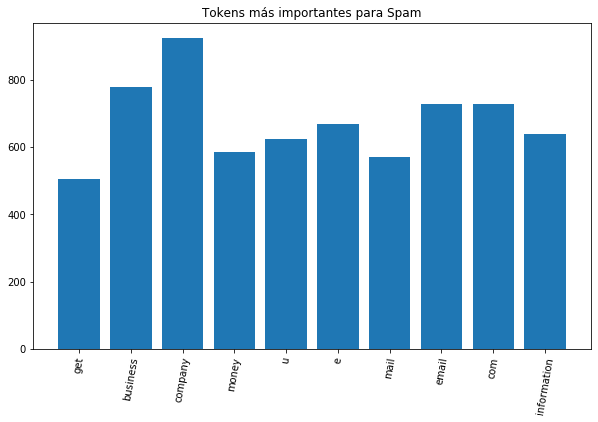

In [30]:
words_spam_lema_dic={}
for j in oracion_spam_lema:
    for i in j:
        if(words_spam_lema_dic.get(i) == None):
            words_spam_lema_dic.setdefault(i, 1)
        else:
            words_spam_lema_dic[i] = words_spam_lema_dic[i] + 1 
for key, value in sorted(words_spam_lema_dic.items(), key=lambda kv: kv[1], reverse=True):
    print("%s: %s" % (key, value)) 
filtradas_spam_lema = {}
for clave, valor in zip(words_spam_lema_dic.keys(), words_spam_lema_dic.values()):
  if(valor >= 500):
    filtradas_spam_lema.setdefault(clave, valor)

# Ploteamos los elementos en el diccionario
plt.figure(figsize=(10,6))
plt.bar(filtradas_spam_lema.keys(), filtradas_spam_lema.values())
plt.title('Tokens más importantes para Spam') 
plt.xticks(rotation=80)
plt.show()

In [ ]:
print(len(oracion_spam_lema))

# TF_IDF

***Trabajar con el TF_IDF nos permitira, hacer una asignación de pesos a cada uno de los tokens, tomando en consideración la cantidad de repeticiones de la palabra, en correspondencia con la cantidad de horaciones, esto permitira que las palabras que más se repitan en más horaciones, tendran un valor de 1, y aquellas con menor presencia tendran mayor valor.***

***Las primeras dos celdas se realiza el proceso con los mensajes de spam y ham originales, previo a el procesamiento del texto y su limpieza.***

***Para este proceso, primero inicializamos el vectorizador, y realizamos una transformacion de los mensajes en un vector de palabras, visualizamos su longitud. Este vector solo contendra aquellas palabras unicas de cada oracion que no se repitan en el resto. Finalmente se inicializará el tfidftransformer y se ajustara acorde a el vector generado anteriormente para obetener el valor de los pesos. Se finaliza creando un Dataframe que incliuya las palabras como indíces y los valores como columnas, ordenadas de menor a mayor.***

In [101]:
CV_spm = CountVectorizer()
VectorPalabras_spm = CV_spm.fit_transform(spam_messages)
print("Forma del vector(Textos, Vocabulario) = " + str(VectorPalabras_spm.shape))

tfidf_transformer_spm = TfidfTransformer(smooth_idf=False, sublinear_tf=False, use_idf=True)
tfidf_transformer_spm.fit(VectorPalabras_spm)

df_idf_spm = pd.DataFrame(tfidf_transformer_spm.idf_, index = CV_spm.get_feature_names(), columns = ["Pesos-IDF"])
df_idf_spm=df_idf_spm.sort_values(by=['Pesos-IDF'])
df_idf_spm.head(40)

Forma del vector(Textos, Vocabulario) = (1093, 17030)


Pesos-IDF
subject       1.000000
to            1.165807
the           1.244411
and           1.322120
you           1.324649
of            1.354195
your          1.383297
for           1.411890
is            1.454210
in            1.486423
this          1.692233
we            1.716286
with          1.729481
be            1.748639
have          1.764233
our           1.792124
are           1.798203
not           1.808417
from          1.831264
it            1.854644
on            1.919039
here          1.949309
that          1.954049
or            2.000229
will          2.012745
all           2.030535
by            2.051261
at            2.077788
com           2.118946
do            2.158951
if            2.194563
more          2.212856
no            2.240939
http          2.279654
can           2.296238
now           2.296238
one           2.296238
please        2.347707
an            2.351235
information   2.372664

In [102]:
CV_ham = CountVectorizer()
VectorPalabras_ham = CV_ham.fit_transform(ham_messages)
print("Forma del vector(Textos, Vocabulario) = " + str(VectorPalabras_ham.shape))

tfidf_transformer_ham = TfidfTransformer(smooth_idf=False, sublinear_tf=False, use_idf=True)
tfidf_transformer_ham.fit(VectorPalabras_ham)

df_idf_ham = pd.DataFrame(tfidf_transformer_ham.idf_, index = CV_ham.get_feature_names(), columns = ["Pesos-IDF"])
df_idf_ham=df_idf_ham.sort_values(by=['Pesos-IDF'])
df_idf_ham.head(40)

Forma del vector(Textos, Vocabulario) = (3489, 25048)


Pesos-IDF
subject    1.000000
to         1.070960
the        1.085215
and        1.197047
for        1.222857
you        1.224291
of         1.264545
on         1.299890
in         1.304154
is         1.352303
have       1.443139
vince      1.445374
this       1.477657
with       1.478581
be         1.486942
enron      1.524969
that       1.565004
please     1.567529
will       1.570567
your       1.607761
at         1.610396
we         1.610924
if         1.612509
are        1.660163
from       1.669637
it         1.689999
me         1.703809
cc         1.708454
am         1.719575
by         1.742195
as         1.750053
re         1.772760
kaminski   1.790293
would      1.815239
can        1.870494
thanks     1.900368
2000       1.918155
pm         1.962183
or         1.963685
ect        2.005885

***Se comprobará ahora, con las tablas de tf_idf, el resultado una vez realizado el filtrado y proesamiento de los mensajes.***

### Spam

***Primeramente es necesario agrupar nuevamente los tokens, para formar las oraciones de nueva cuenta, para posteriormente realizar el proceso de tf_idf.***

In [84]:
oraciones_spm_proce=[]
for i in range(0,len(oracion_spam_lema)):
    tmp=(oracion_spam_lema[i])
    oraciones_spm_proce.append(" ".join(tmp))

In [109]:
CV_spm = CountVectorizer()
VectorPalabras_spm = CV_spm.fit_transform(oraciones_spm_proce)
print("Forma del vector(Textos, Vocabulario) = " + str(VectorPalabras_spm.shape))

tfidf_transformer_spm = TfidfTransformer(smooth_idf=False, sublinear_tf=False, use_idf=True)
tfidf_transformer_spm.fit(VectorPalabras_spm)

df_idf_spm = pd.DataFrame(tfidf_transformer_spm.idf_, index = CV_spm.get_feature_names(), columns = ["Pesos-IDF"])
df_idf_spm=df_idf_spm.sort_values(by=['Pesos-IDF'])
df_idf_spm.head(40)

Forma del vector(Textos, Vocabulario) = (1093, 15566)


Pesos-IDF
com           2.118946
http          2.273096
one           2.282949
please        2.347707
information   2.361892
business      2.401970
get           2.416952
click         2.416952
email         2.439853
time          2.451504
offer         2.459347
best          2.503620
new           2.516043
day           2.545643
mail          2.549944
make          2.554264
site          2.567336
money         2.580581
company       2.589510
see           2.607610
need          2.640095
message       2.640095
like          2.649574
price         2.649574
list          2.654347
want          2.659143
may           2.688414
www           2.708414
free          2.713478
life          2.723682
website       2.744408
way           2.781746
order         2.803725
future        2.814898
address       2.814898
10            2.831896
use           2.843390
software      2.884694
take          2.902931
save          2.934086

#### ham

In [85]:
oraciones_ham_proce=[]
for i in range(0,len(oracion_ham_lema)):
    tmp=(oracion_ham_lema[i])
    oraciones_ham_proce.append(" ".join(tmp))

In [108]:
CV_ham = CountVectorizer()
VectorPalabras_ham = CV_ham.fit_transform(oraciones_ham_proce)
print("Forma del vector(Textos, Vocabulario) = " + str(VectorPalabras_ham.shape))

tfidf_transformer_ham = TfidfTransformer(smooth_idf=False, sublinear_tf=False, use_idf=True)
tfidf_transformer_ham.fit(VectorPalabras_ham)

df_idf_ham = pd.DataFrame(tfidf_transformer_ham.idf_, index = CV_ham.get_feature_names(), columns = ["Pesos-IDF"])
df_idf_ham=df_idf_ham.sort_values(by=['Pesos-IDF'])
df_idf_ham.head(40)

Forma del vector(Textos, Vocabulario) = (3489, 23049)


Pesos-IDF
vince         1.445374
enron         1.524969
please        1.567529
cc            1.708454
kaminski      1.790293
would         1.815239
thanks        1.900368
2000          1.918155
pm            1.962183
ect           2.005885
know          2.032087
com           2.058169
hou           2.067294
time          2.115959
let           2.204642
like          2.222000
group         2.274933
research      2.299856
10            2.325417
forwarded     2.342828
need          2.365026
also          2.366149
may           2.384290
2001          2.412134
one           2.462808
regard        2.479028
get           2.489142
work          2.508386
week          2.521424
11            2.534634
forward       2.537297
01            2.589293
information   2.590698
look          2.602014
houston       2.613459
meeting       2.635278
call          2.636749
new           2.641177
question      2.641177
message       2.647112

### SVM clasificación

In [93]:
Y_train_lim=[]
X_train_lim=oraciones_spm_proce
for i in range(0,len(oraciones_spm_proce)):
    Y_train_lim.append(1)
for i in range(0,len(oraciones_ham_proce)):
    Y_train_lim.append(0)
X_train_lim=X_train_lim+oraciones_ham_proce

In [97]:
print(str(len(X_train_lim))+", "+str(len(oraciones_spm_proce))+", "+str(len(oraciones_ham_proce))+", "+str(len(Y_train_lim)))

4582, 1093, 3489, 4582
